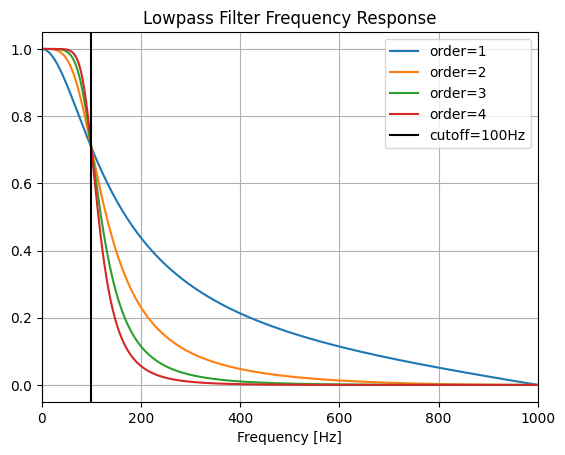

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


def butter_lowpass(lowcut, fs, order=4):
    '''バターワースローパスフィルタを設計する関数
    '''
    nyq = 0.5 * fs
    low = lowcut / nyq
    b, a = signal.butter(order, low, btype='low')
    return b, a


# Plotting the frequency response.
fs = 2000 # sampling frequency
cutoff = 100 # cutoff frequency

plt.figure()
# 次数1~4まで繰り返し描画
for i in range(1, 5):
    b, a = butter_lowpass(cutoff, fs, order=i)
    w, h = signal.freqz(b, a)
    plt.plot(0.5*fs*w/np.pi, np.abs(h), label='order='+str(i))
plt.axvline(cutoff, color='k', label='cutoff={}Hz'.format(cutoff))
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.legend(loc='best')
plt.grid()

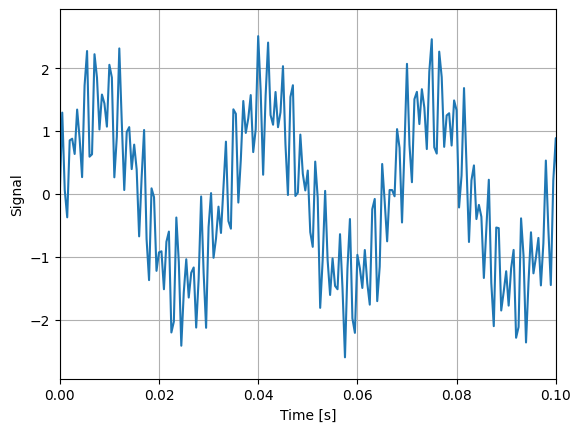

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

N = 1024            # サンプル数
dt = 0.0005          # サンプリング周期 [s]
fs = 1 / dt         # サンプリング周波数 [Hz]
f1, f2, f3 = 30, 432, 604    # サンプルデータの周波数 [Hz]

t = np.arange(0, N * dt, dt) # 時間 [s]
x = 1.5 * np.sin(2 * np.pi * f1 * t) \
    + 0.5 * np.sin(2 * np.pi * f2 * t) \
    + 0.7 * np.sin(2 * np.pi * f3 * t) # データ

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Signal")
ax.set_xlim([0, 0.1])
ax.grid()
plt.show()

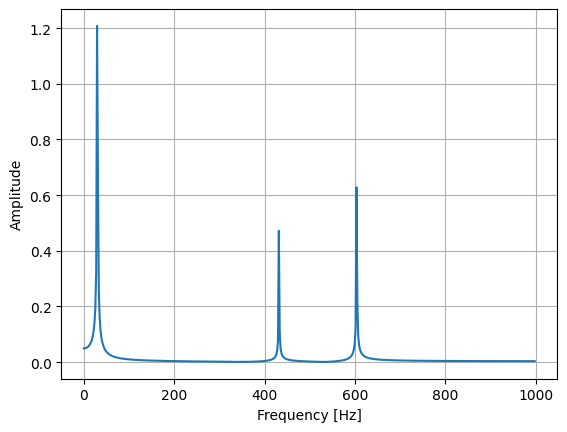

In [7]:
# 高速フーリエ変換
def calc_amp(data, fs):
    '''フーリエ変換して振幅スペクトルを計算する関数
    '''
    N = len(data)
    #window = signal.hann(N)
    #F = np.fft.fft(data * window)
    F = np.fft.fft(data)              # フーリエ変換
    freq = np.fft.fftfreq(N, d=1/fs) # 周波数スケール
    F = F / (N / 2) # フーリエ変換の結果を正規化
    #F = F * (N / sum(window)) # 窓関数による振幅減少を補正する
    Amp = np.abs(F) # 振幅スペクトル
    return Amp, freq


Amp, freq = calc_amp(x, fs)
fig, ax = plt.subplots()
ax.plot(freq[:N//2], Amp[:N//2])
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Amplitude")
ax.grid()
plt.show()

In [8]:
from scipy import signal

def butter_lowpass(lowcut, fs, order=4):
    '''バターワースローパスフィルタを設計する関数
    '''
    nyq = 0.5 * fs
    low = lowcut / nyq
    b, a = signal.butter(order, low, btype='low')
    return b, a


def butter_lowpass_filter(x, lowcut, fs, order=4):
    '''データにローパスフィルタをかける関数
    '''
    b, a = butter_lowpass(lowcut, fs, order=order)
    y = signal.filtfilt(b, a, x)
    return y

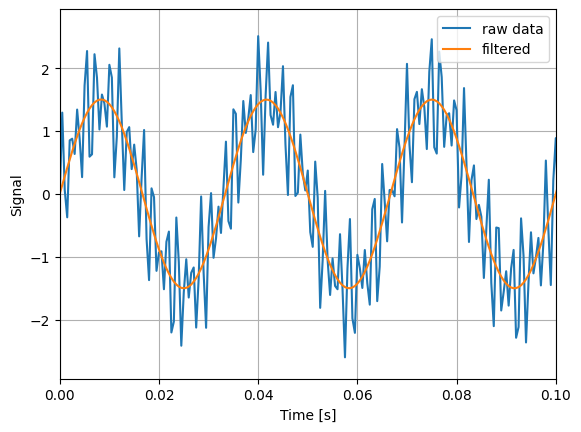

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


def butter_lowpass(lowcut, fs, order=4):
    '''バターワースローパスフィルタを設計する関数
    '''
    nyq = 0.5 * fs
    low = lowcut / nyq
    b, a = signal.butter(order, low, btype='low')
    return b, a


def butter_lowpass_filter(x, lowcut, fs, order=4):
    '''データにローパスフィルタをかける関数
    '''
    b, a = butter_lowpass(lowcut, fs, order=order)
    y = signal.filtfilt(b, a, x)
    return y


N = 1024            # サンプル数
dt = 0.0005          # サンプリング周期 [s]
fs = 1 / dt
f1, f2, f3 = 30, 432, 604    # 周波数 [Hz]

t = np.arange(0, N * dt, dt) # 時間 [s]
x = 1.5 * np.sin(2 * np.pi * f1 * t) \
    + 0.5 * np.sin(2 * np.pi * f2 * t) \
    + 0.7 * np.sin(2 * np.pi * f3 * t) # データ

y = butter_lowpass_filter(x, 100, fs, order=4)
fig, ax = plt.subplots()
ax.plot(t, x, label='raw data')
ax.plot(t, y, label='filtered')
ax.set_xlabel("Time [s]")
ax.set_ylabel("Signal")
ax.set_xlim([0, 0.1])
ax.grid()
plt.legend(loc='best')
plt.show()

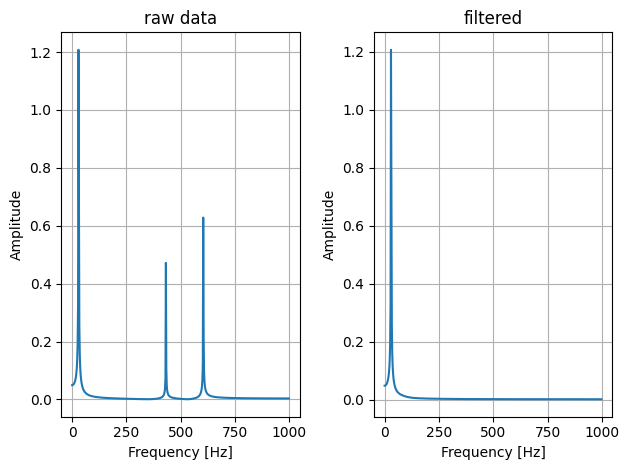

In [10]:
# 高速フーリエ変換
def calc_amp(data, fs):
    '''振幅スペクトルを計算する関数
    '''
    N = len(data)
    #window = signal.hann(N)
    #F = np.fft.fft(data * window)
    F = np.fft.fft(data)              # フーリエ変換
    freq = np.fft.fftfreq(N, d=1/fs) # 周波数スケール
    F = F / (N / 2) # フーリエ変換の結果を正規化
    #F = F * (N / sum(window)) # 窓関数による振幅減少を補正する
    Amp = np.abs(F) # 振幅スペクトル
    return Amp, freq


Amp, freq = calc_amp(x, fs)
fig, ax = plt.subplots(1,2)
ax[0].plot(freq[:N//2], Amp[:N//2])
ax[0].set_xlabel("Frequency [Hz]")
ax[0].set_ylabel("Amplitude")
ax[0].set_title('raw data')
ax[0].grid()
Amp_filt, freq_filt = calc_amp(y, fs)
ax[1].plot(freq_filt[:N//2], Amp_filt[:N//2])
ax[1].set_xlabel("Frequency [Hz]")
ax[1].set_ylabel("Amplitude")
ax[1].set_title('filtered')
ax[1].grid()
plt.tight_layout()
plt.show()